#Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import  matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Ass_04/Question/ames_housing_data (1).xlsx")

In [ ]:
dat = data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Sample Defination

##Only Residencial

In [ ]:
print(dat['Zoning'].value_counts())
residential_zoning_types = ['RH', 'RL', 'RP', 'RM'] #2762

dat = dat[dat['Zoning'].isin(residential_zoning_types)]
print(dat['Zoning'].value_counts())
print(len(dat))

Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: count, dtype: int64
Zoning
RL    2273
RM     462
RH      27
Name: count, dtype: int64
2762


##IR3 & IR2

In [ ]:
print(dat['LotShape'].value_counts())

condition = (dat['LotShape'] == 'IR3') | (dat['LotShape'] == 'IR2') #2674
dat = dat[~condition]

print(dat['LotShape'].value_counts())
print(len(dat))

LotShape
Reg    1737
IR1     937
IR2      72
IR3      16
Name: count, dtype: int64
LotShape
Reg    1737
IR1     937
Name: count, dtype: int64
2674


##Utilities

In [ ]:
print(dat['Utilities'].value_counts())

condition = (dat['Utilities'] == 'ELO') | (dat['Utilities'] == 'NoSeWa') | (dat['Utilities'] == 'NoSewr')
dat = dat[~condition]
print(len(dat))
dat['Utilities'].value_counts()

Utilities
AllPub    2672
NoSeWa       1
NoSewr       1
Name: count, dtype: int64
2672


Utilities
AllPub    2672
Name: count, dtype: int64

##BldgType

In [ ]:
print(dat['BldgType'].value_counts())

condition = dat['BldgType'] != '1Fam'
dat = dat[~condition]
print(len(dat))


print(dat['BldgType'].value_counts())

BldgType
1Fam      2240
TwnhsE     184
Duplex     108
Twnhs       82
2fmCon      58
Name: count, dtype: int64
2240
BldgType
1Fam    2240
Name: count, dtype: int64


##GrLivArea

In [ ]:
dat = dat[dat['GrLivArea'] <= 4000]
len(dat)

2236

##KitchenAbvGr

In [ ]:
dat['KitchenAbvGr'].value_counts()

KitchenAbvGr
1    2228
2       6
3       1
0       1
Name: count, dtype: int64

In [ ]:
# Removing rows where 'KitchenAbvGr' is equal to 0 or 3
dat = dat[(dat['KitchenAbvGr'] != 0) & (dat['KitchenAbvGr'] != 3)]
len(dat)

2234

##TotRmsAbvGrd

In [ ]:
dat['TotRmsAbvGrd'].value_counts()

TotRmsAbvGrd
6     671
7     544
5     426
8     268
4     124
9     115
10     48
11     24
3       8
12      5
2       1
Name: count, dtype: int64

In [ ]:
# Removing rows where 'TotRmsAbvGrd' is equal to 0, 1, 2, or 12
dat = dat[~dat['TotRmsAbvGrd'].isin([0, 1, 2, 12])]
len(dat)

2228

##PoolArea

In [ ]:
dat['PoolArea'].value_counts()

PoolArea
0      2218
144       1
576       1
368       1
444       1
228       1
561       1
648       1
800       1
512       1
738       1
Name: count, dtype: int64

In [ ]:
dat = dat[dat['PoolArea'] == 0]
dat['PoolArea'].value_counts()

PoolArea
0    2218
Name: count, dtype: int64

##Normal SaleCondition

In [ ]:
# Filter the DataFrame to include only rows where SaleCondition is "Normal"
print(dat['SaleCondition'].value_counts())

dat = dat[dat['SaleCondition'] == 'Normal']
dat['SaleCondition'].value_counts()

SaleCondition
Normal     1859
Partial     164
Abnorml     143
Family       38
Alloca        7
AdjLand       7
Name: count, dtype: int64


SaleCondition
Normal    1859
Name: count, dtype: int64

##Adding Column

##LogSalePrice


In [ ]:
dat['LogSalePrice'] = np.log(dat['SalePrice'])

dat['LogSalePrice'].describe()

count    1859.000000
mean       12.011653
std         0.365016
min        10.463103
25%        11.775290
50%        11.976659
75%        12.225875
max        13.345507
Name: LogSalePrice, dtype: float64

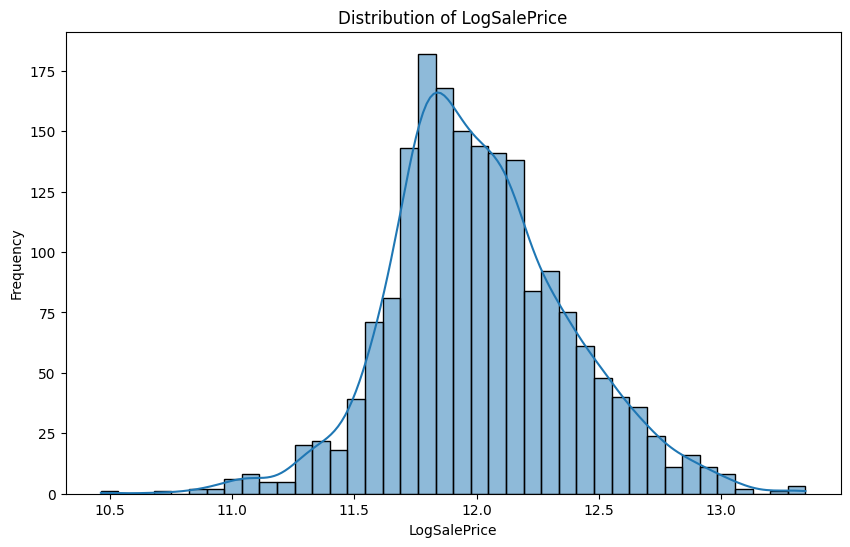

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dat['LogSalePrice'], kde=True)
plt.title('Distribution of LogSalePrice')
plt.xlabel('LogSalePrice')
plt.ylabel('Frequency')
plt.show()

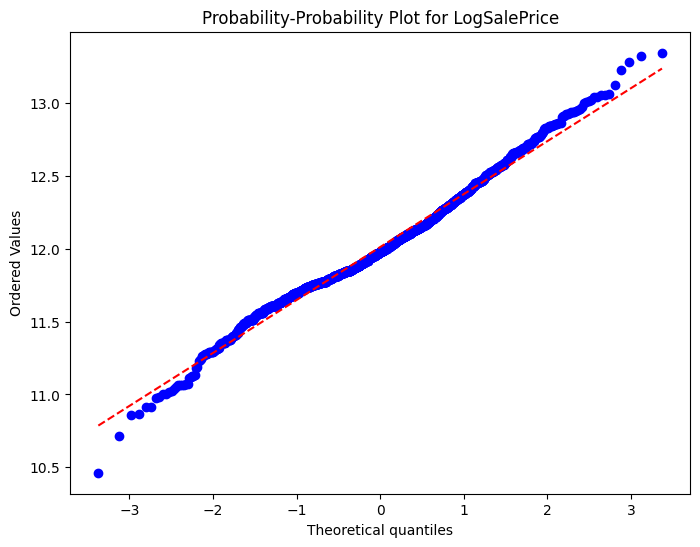

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
stats.probplot(dat['LogSalePrice'], dist="norm", plot=ax)
ax.set_title('Probability-Probability Plot for LogSalePrice')
ax.get_lines()[1].set_linestyle('--')  # Change style of reference line to dashed
plt.show()

In [ ]:
da = dat
condition = dat['LogSalePrice'] < 10.75   #last 2 rows

# Step 2: Remove rows where the condition is True
da = da[~condition]

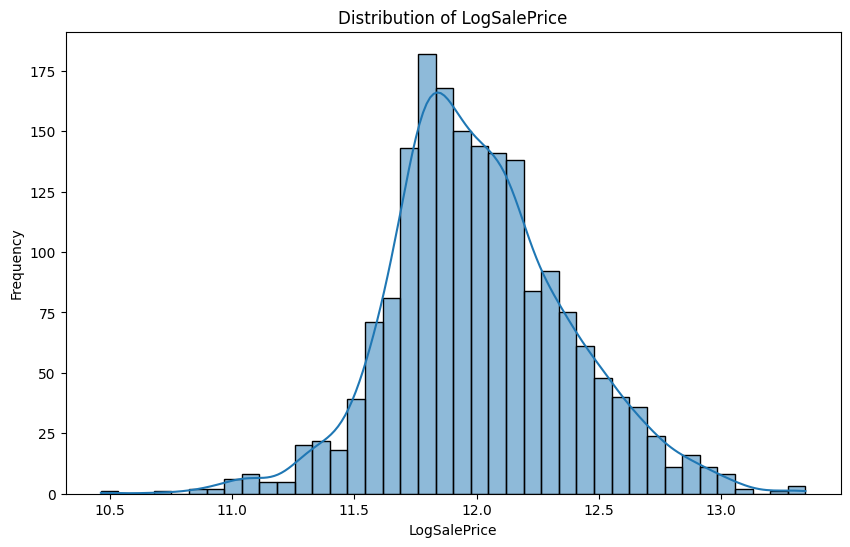

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dat['LogSalePrice'], kde=True)
plt.title('Distribution of LogSalePrice')
plt.xlabel('LogSalePrice')
plt.ylabel('Frequency')
plt.show()

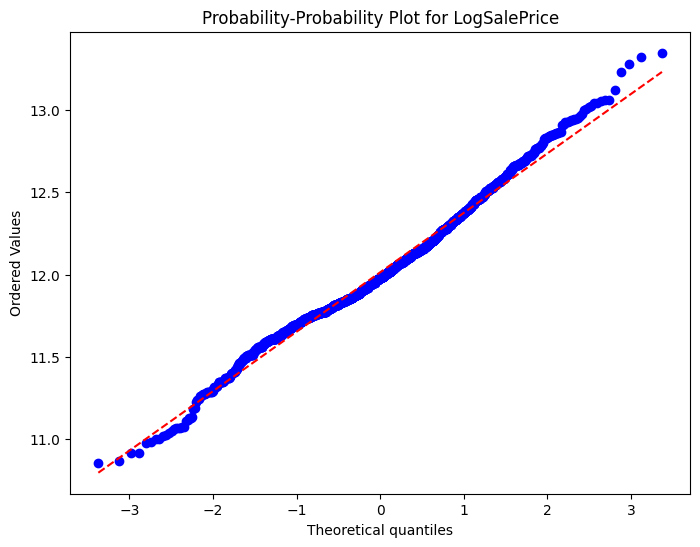

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
stats.probplot(da['LogSalePrice'], dist="norm", plot=ax)
ax.set_title('Probability-Probability Plot for LogSalePrice')
ax.get_lines()[1].set_linestyle('--')  # Change style of reference line to dashed
plt.show()

In [ ]:
dat = da

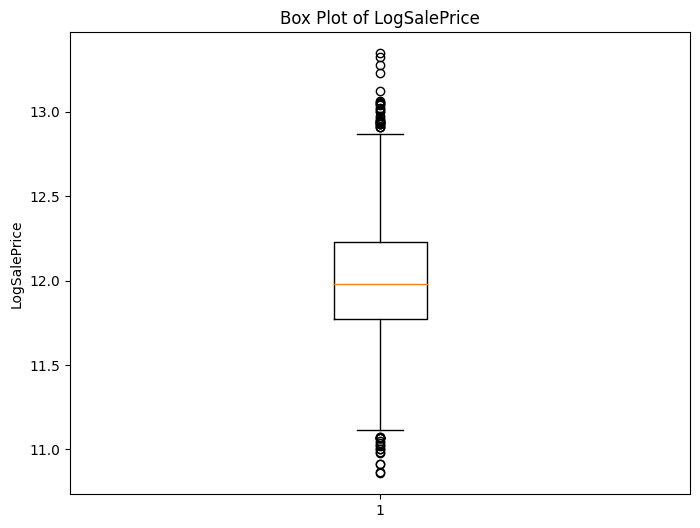

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(dat['LogSalePrice'])
plt.title('Box Plot of LogSalePrice')
plt.ylabel('LogSalePrice')
plt.show()

In [ ]:
len(dat)

1857

##HouseAge

###2 Types of ages

In [ ]:
da['HouseAge1'] = dat['YrSold'] - dat['YearBuilt']
da['HouseAge2'] = dat['YrSold'] - dat['YearRemodel']

###On basis of Correlation Cofficients

In [ ]:
print(dat.LogSalePrice.corr(da.HouseAge1))

print(dat.LogSalePrice.corr(da.HouseAge2))


-0.618396836832267
-0.5354970661138186


In [ ]:
dat['HouseAge1'] = dat['YrSold'] - dat['YearBuilt']

###Dropping all Time data

In [ ]:
dat = dat.drop(columns=['YrSold', 'YearBuilt', 'YearRemodel', 'MoSold'])

##Quality Analysis

In [ ]:
dat['QualityIndex'] = (dat['OverallQual'] + dat['OverallCond'])/2

In [ ]:
print(dat['OverallQual'].corr(dat.LogSalePrice))
print(dat['OverallCond'].corr(dat.LogSalePrice))
dat['QualityIndex'].corr(dat.LogSalePrice)

0.8214472111246286
-0.0891557886800716


0.5865562596096021

In [ ]:
dat.drop(['QualityIndex', 'OverallCond'], axis=1, inplace=True)

##ExterQuality

In [ ]:
# Define the mapping dictionary
exterqual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}

# Map the values
da['ExterQual'] = dat['ExterQual'].map(exterqual_map)
da['ExterCond'] = dat['ExterCond'].map(exterqual_map)

In [ ]:
print(da.ExterQual.corr(da.LogSalePrice))
da.ExterCond.corr(da.LogSalePrice)

0.6568428241693856


0.02441058235868383

In [ ]:
dat.drop(['ExterCond'], axis=1, inplace=True)

##BsmtQual

In [ ]:
bsmt_qual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
bsmt_cond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
bsmt_exposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}

# Map the values for each column
da['BsmtQual'] = da['BsmtQual'].map(bsmt_qual_map)
da['BsmtCond'] = da['BsmtCond'].map(bsmt_cond_map)
da['BsmtExposure'] = da['BsmtExposure'].map(bsmt_exposure_map)

In [ ]:
da['Bsmt'] = (da['BsmtExposure'] + da['BsmtCond'] + da['BsmtQual'])/3


In [ ]:
print(da.BsmtQual.corr(da.LogSalePrice))
print(da.BsmtCond.corr(da.LogSalePrice))
print(da.Bsmt.corr(da.LogSalePrice))
da.BsmtExposure.corr(da.LogSalePrice)

0.678362438776431
0.1765102433924825
0.6119186094267672


0.3927091776589417

In [ ]:
dat.TotalBsmtSF.corr(dat.LogSalePrice)

0.6422360020305986

###Remove all irrelevant Bsmt columms

In [ ]:
columns_to_drop = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF']
dat.drop(columns=columns_to_drop, axis=1, inplace=True)

##WeatherControl

In [ ]:
# Mapping for HeatingQC
heatingqc_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
dat['HeatingQC'] = dat['HeatingQC'].map(heatingqc_map)

# Mapping for CentralAir
centralair_map = {'N': 1, 'Y': 2}
dat['CentralAir'] = dat['CentralAir'].map(centralair_map)

In [ ]:
dat['WeatherControl'] = dat['HeatingQC'] * dat['CentralAir']

In [ ]:
print(dat.HeatingQC.corr(dat.LogSalePrice))
print(dat.CentralAir.corr(dat.LogSalePrice))
print(dat.WeatherControl.corr(dat.LogSalePrice))

0.4264757979508425
0.32004283730535044
0.46431201348032747


In [ ]:
dat.drop(['HeatingQC', 'CentralAir'], axis=1, inplace=True)

##Area

In [ ]:
dat.drop(['FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF'], axis=1, inplace=True)   #as already present in GrLivArea

In [ ]:
print(dat.GrLivArea.corr(dat.LogSalePrice))

0.7770484104361972


##BathRooms

In [ ]:
dat['TotalBath'] = dat['BsmtFullBath'] + dat['BsmtHalfBath'] + dat['FullBath'] + dat['HalfBath']

In [ ]:
# Calculate correlation with LogSalePrice for each column
corr_bsmt_full_bath = dat['BsmtFullBath'].corr(dat['LogSalePrice'])
corr_bsmt_half_bath = dat['BsmtHalfBath'].corr(dat['LogSalePrice'])
corr_full_bath = dat['FullBath'].corr(dat['LogSalePrice'])
corr_half_bath = dat['HalfBath'].corr(dat['LogSalePrice'])
corr_total_bath = dat['TotalBath'].corr(dat['LogSalePrice'])

# Print individual correlation values
print("Correlation with LogSalePrice:")
print(f"BsmtFullBath: {corr_bsmt_full_bath}")
print(f"BsmtHalfBath: {corr_bsmt_half_bath}")
print(f"FullBath: {corr_full_bath}")
print(f"HalfBath: {corr_half_bath}")
print(f"TotalBath: {corr_total_bath}")

Correlation with LogSalePrice:
BsmtFullBath: 0.28242902563503625
BsmtHalfBath: -0.04979757913275912
FullBath: 0.6410882997457215
HalfBath: 0.3857280809203815
TotalBath: 0.7208705717750437


In [ ]:
# Drop the specified columns
dat.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1, inplace=True)

##Kitchens

In [ ]:
# Calculate the correlation of KitchenAbvGr with LogSalePrice
corr_kitchen_abv_gr = dat['KitchenAbvGr'].corr(dat['LogSalePrice'])

# Calculate the correlation of KitchenQual with LogSalePrice
# corr_kitchen_qual = dat['KitchenQual'].corr(dat['LogSalePrice'])

print("Correlation of KitchenAbvGr with LogSalePrice:", corr_kitchen_abv_gr)
# print("Correlation of KitchenQual with LogSalePrice:", corr_kitchen_qual)

# Define the mapping dictionary
kitchen_qual_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

# Map the values of the KitchenQual column using the mapping dictionary
dat['KitchenQual'] = dat['KitchenQual'].map(kitchen_qual_mapping)

# Calculate the correlation of KitchenQual with LogSalePrice
corr_kitchen_qual = dat['KitchenQual'].corr(dat['LogSalePrice'])

print("Correlation of KitchenQual with LogSalePrice after mapping:", corr_kitchen_qual)


Correlation of KitchenAbvGr with LogSalePrice: -0.062482900127487515
Correlation of KitchenQual with LogSalePrice after mapping: 0.6357467140651789


In [ ]:
# Drop the KitchenAbvGr column
dat.drop(columns=['KitchenAbvGr'], inplace=True)

##Garage

In [ ]:
# Calculate the correlation between GarageYrBlt, GarageCars, and GarageArea with LogSalePrice
corr_garage_yr_blt = dat['GarageYrBlt'].corr(dat['LogSalePrice'])
corr_garage_cars = dat['GarageCars'].corr(dat['LogSalePrice'])
corr_garage_area = dat['GarageArea'].corr(dat['LogSalePrice'])

# Print the correlation coefficients
print("Correlation between GarageYrBlt and LogSalePrice:", corr_garage_yr_blt)
print("Correlation between GarageCars and LogSalePrice:", corr_garage_cars)
print("Correlation between GarageArea and LogSalePrice:", corr_garage_area)


Correlation between GarageYrBlt and LogSalePrice: 0.5775458513988412
Correlation between GarageCars and LogSalePrice: 0.6930949136903048
Correlation between GarageArea and LogSalePrice: 0.6577648528656188


In [ ]:
# Mapping ordinal values for GarageQual
garage_qual_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
dat['GarageQual'] = dat['GarageQual'].map(garage_qual_mapping)

# Mapping ordinal values for GarageCond
garage_cond_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
dat['GarageCond'] = dat['GarageCond'].map(garage_cond_mapping)

# Calculate GarageIndex
dat['GarageIndex'] = (dat['GarageQual'] + dat['GarageCond']) / 2



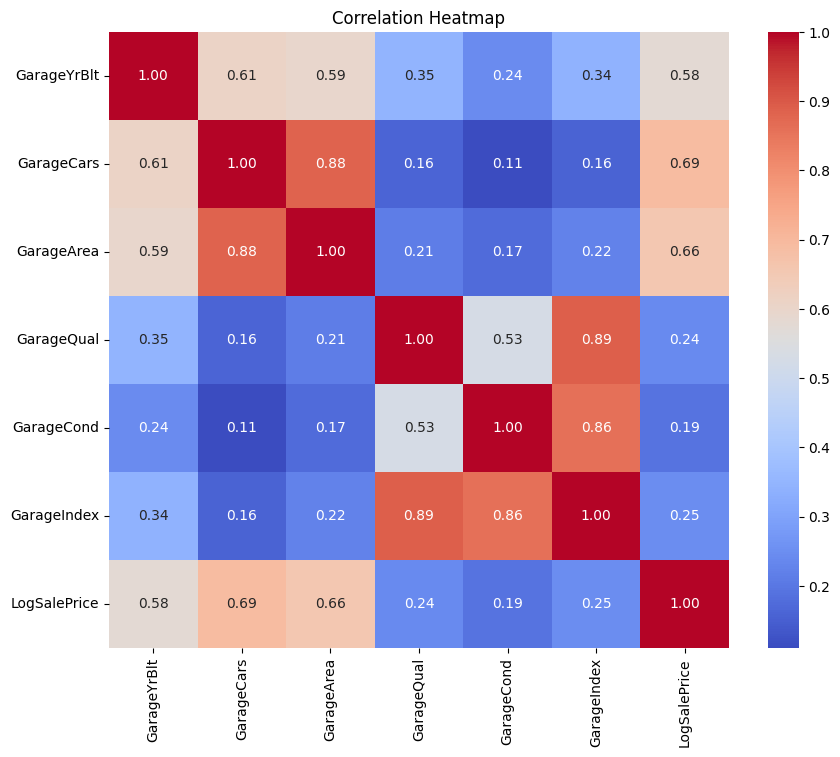

In [ ]:
corr_garage = dat[['GarageYrBlt', 'GarageCars', 'GarageArea','GarageQual', 'GarageCond', 'GarageIndex', 'LogSalePrice']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_garage, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
dat.drop(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'], axis=1, inplace=True)

In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1857 entries, 0 to 2929
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SID             1857 non-null   int64  
 1   PID             1857 non-null   int64  
 2   SubClass        1857 non-null   int64  
 3   Zoning          1857 non-null   object 
 4   LotFrontage     1511 non-null   float64
 5   LotArea         1857 non-null   int64  
 6   Street          1857 non-null   object 
 7   Alley           98 non-null     object 
 8   LotShape        1857 non-null   object 
 9   LandContour     1857 non-null   object 
 10  Utilities       1857 non-null   object 
 11  LotConfig       1857 non-null   object 
 12  LandSlope       1857 non-null   object 
 13  Neighborhood    1857 non-null   object 
 14  Condition1      1857 non-null   object 
 15  Condition2      1857 non-null   object 
 16  BldgType        1857 non-null   object 
 17  HouseStyle      1857 non-null   object

In [ ]:
dat.to_csv('/content/drive/MyDrive/SampledData.csv', index=False)